In [1]:
#設定環境變數為tensorflow
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
import numpy
import matplotlib.pyplot as plt

In [3]:
#由keras讀入MNIST資料庫
from keras.datasets import mnist

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

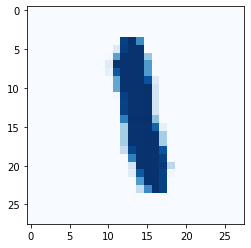

In [5]:
plt.imshow(x_train[9487], cmap='Blues')

In [6]:
y_train[9487]

1

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [8]:
#Output 變為 One-hot encoding形式
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
#建構
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD 

In [11]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [12]:
model = Sequential()

model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [14]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [15]:
#組裝
model.compile(loss='mse',
                  optimizer=SGD(lr=0.1), 
                      metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
________________________________________________

In [ ]:
interact_manual(test, ID=(0,9999))

In [ ]:
model_jason = model.to_json()

open('model_json.json','w').write(model_jason)
model.save_weights('weights.h5')